In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [73]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(512, activation='relu', kernel_initializer="uniform"))
# model.add(tf.keras.layers.Dense(128, activation='relu', kernel_initializer="uniform"))
# model.add(tf.keras.layers.Dense(128, activation='relu', kernel_initializer="uniform"))
# model.add(tf.keras.layers.Dense(64, activation='relu', kernel_initializer="uniform"))
model.add(tf.keras.layers.Dense(256, activation='relu', kernel_initializer="uniform"))
model.add(tf.keras.layers.Dense(32, activation='relu', kernel_initializer="uniform"))
model.add(tf.keras.layers.Dense(1, kernel_initializer="uniform"))

In [74]:
class MLP(tf.keras.Model):
    def __init__(self, train_params):
        super().__init__()
        self.L1 = tf.keras.layers.Dense(512, activation='relu', kernel_initializer="uniform")
        self.L2 = tf.keras.layers.Dense(256, activation='relu', kernel_initializer="uniform")
        self.L3 = tf.keras.layers.Dense(32, activation='relu', kernel_initializer="uniform")

        self.OutputLayer = tf.keras.layers.Dense(1, kernel_initializer="uniform")
        self.trainInputs = tf.constant(train_params.numpy())
    
    def updt(self, x, model):
        #Tensorflow uses deferrred initialization, so first run the model to create the input shape
        self(x)
        #Get model weights (which are set as the weights of the dense layer - self.DenseLayer)
        self.set_weights(model.get_weights())
        #Freeze the set weights 
        self.L1.trainable = False
        self.L2.trainable = False
        self.L3.trainable = False
        self.OutputLayer.trainable = False
        #Set the trainInputs attribute to trainable - it is not exactly a part of the neural network here, but rather just the input
        self.trainInputs = tf.Variable(x.numpy(), trainable=True)
    
    def call(self, x_dummy):
        #x_dummy is not used, but it's needed to use the .call(x) method
    
        #Run the model with the trainInputs as the input each time .call(x) is used
        x = self.trainInputs
        return self.OutputLayer(self.L3(self.L2(self.L1(x))))

In [75]:
def generateData():
    x1 = tf.range(0, 2, delta=0.001)

    return x1

x = generateData()

In [76]:
TL = 100.0
T0 = 200.0
h = 100.0
k = 400.0
L = 2.0
d = 0.2
r = d/2
P = 2*np.pi*(r)
Tinf = 20.0
Ac = np.pi*(r**2)
m = np.sqrt(h*P/(k*Ac));

def genFunc(x):
    return -1*(((TL - Tinf)/(T0-Tinf)*np.sinh(m*x) + np.sinh(m*(L-x)))/np.sinh(m*L)*(T0-Tinf)+Tinf)

y = genFunc(x)

In [77]:
learning_rate = 0.0005
opt = tf.keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=opt, loss=tf.keras.losses.MSE)

In [78]:
model.fit(x, y, epochs = 20, batch_size=1)

Epoch 1/20
2000/2000 [==============================] - 2s 1ms/step - loss: 1327.4395
Epoch 2/20
2000/2000 [==============================] - 2s 980us/step - loss: 293.7326
Epoch 3/20
2000/2000 [==============================] - 2s 1ms/step - loss: 87.1805
Epoch 4/20
2000/2000 [==============================] - 2s 972us/step - loss: 26.9830
Epoch 5/20
2000/2000 [==============================] - 2s 931us/step - loss: 7.0351
Epoch 6/20
2000/2000 [==============================] - 2s 932us/step - loss: 3.3064
Epoch 7/20
2000/2000 [==============================] - 2s 961us/step - loss: 1.7512
Epoch 8/20
2000/2000 [==============================] - 2s 985us/step - loss: 1.7437
Epoch 9/20
2000/2000 [==============================] - 2s 1ms/step - loss: 1.4083
Epoch 10/20
2000/2000 [==============================] - 2s 1ms/step - loss: 0.9389
Epoch 11/20
2000/2000 [==============================] - 2s 1ms/step - loss: 1.0999
Epoch 12/20
2000/2000 [==============================] - 2s 800us/

In [48]:
#Test prediction 
pred = model(np.array([[1.18]]))

In [49]:
yVal = ((TL - Tinf)/(T0-Tinf)*np.sinh(m*1.18) + np.sinh(m*(L-1.18)))/np.sinh(m*L)*(T0-Tinf)+Tinf

In [50]:
err = abs(yVal - (-1*pred))/yVal*100
print('The percent true error in this prediction is ' + str(err.numpy()[0][0]) + '%.')

The percent true error in this prediction is 0.073217325%.


In [51]:
# Feature generation

def plotComparision(x_feats, model):
    #reassign the ith dimension/feature
#     feats = tf.reshape(tf.range(-1, 1, 0.002), shape=(1000, 1))
#     x_feats = tf.concat(feats, 1)
    x_feats = tf.reshape(x_feats, shape=(2000, 1))
    plt.plot(x_feats, genFunc(x_feats))
    plt.plot(x_feats, model(x_feats))

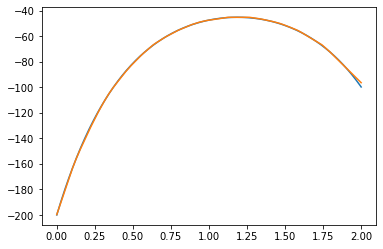

In [52]:
#Fairly good agreement between model and true function, except for a deviation at the end
plotComparision(x, model)

In [53]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 512)               1024      
_________________________________________________________________
dense_9 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_10 (Dense)             (None, 32)                8224      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 33        
Total params: 140,609
Trainable params: 140,609
Non-trainable params: 0
_________________________________________________________________


In [54]:
#Initialize model
optimizationModel = MLP(tf.random.uniform(shape=(1, 1), minval=0, maxval=2))
optimizationModel.updt(tf.random.uniform(shape=(1, 1), minval=0, maxval=2), model)

In [55]:
#Trainable variable is the distance along the rod 
optimizationModel.trainable_variables

[<tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[1.5716479]], dtype=float32)>]

In [58]:
model(optimizationModel.trainable_variables[0].numpy())*-1

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[54.97818]], dtype=float32)>

In [60]:
genFunc(optimizationModel.trainable_variables[0].numpy())

array([[-55.244846]], dtype=float32)

In [62]:
means = tf.reshape(tf.reduce_mean(x, axis=0), shape=(1, 1))
stds = tf.reshape(tf.math.reduce_std(x, axis=0), shape=(1, 1))

In [63]:
x = np.reshape(x, (x.shape[0], 1))

In [68]:
#Custom losses defined here

#First custom loss yields the maximum of the reflected curve (i.e. a maximumm in the original curve)
#Second custom loss searches for a particular value 
#Third custom loss prevents the algorithm from extrapolating past the physical boundaries of the rod 

def minimizationLoss(y_dummy, y_pred):
    result = tf.cond(y_pred <= tf.constant([0.0]), lambda : -10*y_pred + 1, lambda : 1/(tf.square(y_pred) + 1))
    return result

def searchLoss(y_dummy, y_pred):
    return tf.square(y_pred+120)
#     return tf.sqrt(y_pred)

def extrapolationLoss(weights):
    
    mask1 = weights < tf.zeros((1,1)) + 0.01
    mask2 = weights > tf.zeros((1,1)) + 1.99
    masked_loss = tf.boolean_mask(weights, tf.logical_or(mask1, mask2))
    
    return tf.reduce_sum((tf.exp(masked_loss)))*100
    

In [69]:
#In this case, the minimizationLoss is not added as we are searching for a particular value 

opt = tf.keras.optimizers.Adam(learning_rate=0.005)
optimizationModel.compile(optimizer=opt, loss=searchLoss)

optimizationModel.add_loss(
    lambda : extrapolationLoss(optimizationModel.trainable_variables)
)

In [70]:
optimizationModel.fit(tf.convert_to_tensor(x), tf.convert_to_tensor(y), epochs = 5, batch_size=1)

Epoch 1/5
2000/2000 [==============================] - 1s 692us/step - loss: 1853.8198
Epoch 2/5
2000/2000 [==============================] - 1s 666us/step - loss: 1853.6794
Epoch 3/5
2000/2000 [==============================] - 1s 699us/step - loss: 1853.6794
Epoch 4/5
2000/2000 [==============================] - 1s 677us/step - loss: 1853.6794
Epoch 5/5
2000/2000 [==============================] - 1s 687us/step - loss: 1853.6794


In [71]:
print('Distance of 120°C is ' + str(optimizationModel.trainable_variables[0].numpy()[0][0]) + 'm')

Distance of 120°C is 2.1381943m


In [72]:
# print('Minimum temperature is ' + str(model(optimizationModel.trainable_variables[0].numpy()).numpy()[0][0]*-1) + '°C')

In [272]:
model(np.array([[1.18]]))

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[-46.064125]], dtype=float32)>

In [270]:
yVal = ((TL - Tinf)/(T0-Tinf)*np.sinh(m*1.18) + np.sinh(m*(L-1.18)))/np.sinh(m*L)*(T0-Tinf)+Tinf

In [271]:
yVal

45.26015306912875